<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo91/blob/main/Actividad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

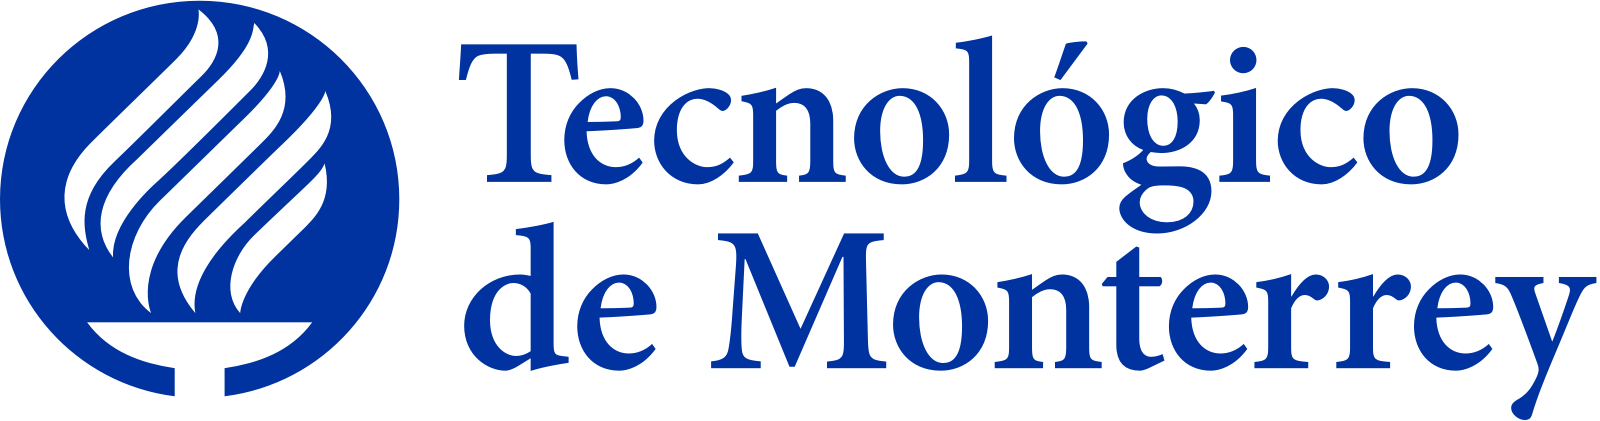

Integrantes: Jose David Hernandez Navarro (A01676755) y Andrea Vazquez Tadeo (A01730613)

Materia: Ciencia de Datos

Maestro: Jobish Vallikavungal Devassi

Fecha: 11 de octubre de 2022

#Parte 1

##Paso 1

In [168]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [79]:
creditos = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

Leemos la base de datos y almacenamos un back up 

In [80]:
creditos_df= pd.read_csv(creditos)
dataframe = creditos_df.copy() #Copiamos la data frame original para tener un respaldo

Eliminamos valores vacios para evitar cualquier tipo de error al realizar la PCA

In [81]:
dataframe.dropna(axis = 0, inplace=True)
dataframe.head() #Imprimimos las primeras 5 filas de la base de datos

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Reemplazaremos los encabezados de las columnas con nombres relacionados a las categorías 

In [82]:
dataframe.rename(columns = {"X1": "MontoTotal", "X2": "Genero", "X3": "Educacion", "X4" : "EstadoCivil", "X5" : "Edad",
                     "X6": "PagoSep", "X7": "PagoAgo", "X8":"PagoJul", "X9": "PagoJun", "X10":"PagoMay", "X11": "PagoAbr", "X12": "FacturaSep", "X13": "FacturaAgo", "X14": "FacturaJul", "X15":"FacturaJun",
                     "X16": "FacturaMay", "X17":"FacturaAbr", "X18":"SaldoSep", "X19":"SaldoAgo", "X20":"SaldoJul", "X21":"SaldoJun", "X22":"SaldoMay", "X23":"SaldoAbr", "Y":"Output"}, inplace = True)
dataframe

,ID,MontoTotal,Genero,Educacion,EstadoCivil,Edad,PagoSep,PagoAgo,PagoJul,PagoJun,...,FacturaJun,FacturaMay,FacturaAbr,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr,Output
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Debido a que la tecnica PCA solo trabaja con variables numericas es indispensable ubicarlas dentro de nuestro conjunto de datos mediante el metodo info

In [83]:
 dataframe.info() #Gracias a este metodo podemos identificatr el numero de filas y columnas de nuestra base de datos, así como el tipo de dato que contine cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           29958 non-null  int64  
 1   MontoTotal   29958 non-null  int64  
 2   Genero       29958 non-null  float64
 3   Educacion    29958 non-null  float64
 4   EstadoCivil  29958 non-null  float64
 5   Edad         29958 non-null  float64
 6   PagoSep      29958 non-null  float64
 7   PagoAgo      29958 non-null  float64
 8   PagoJul      29958 non-null  float64
 9   PagoJun      29958 non-null  float64
 10  PagoMay      29958 non-null  float64
 11  PagoAbr      29958 non-null  float64
 12  FacturaSep   29958 non-null  float64
 13  FacturaAgo   29958 non-null  float64
 14  FacturaJul   29958 non-null  float64
 15  FacturaJun   29958 non-null  float64
 16  FacturaMay   29958 non-null  float64
 17  FacturaAbr   29958 non-null  float64
 18  SaldoSep     29958 non-null  float64
 19  Sald

Los resultados entregados por la función nos indica que de forma automatica pandas no detecto ningun tipo de variable categoríca en nuestro conjunto de datos (object), y aunque en la mayoría de los casos tendemos a confiar en los resultados que nos entregan las librerías, para este ejercicio tenemos que intervenir como cientificos de datos, para poder identificar de manera correcta las columnas que contienen datos categoricos y así poder eliminarlas de nuestra base de datos. 

In [84]:
dataframe = dataframe.drop(["Genero", "Educacion", "EstadoCivil", "PagoSep", "PagoAgo", "PagoJul", "PagoJun", "PagoMay", "PagoAbr", "Output"], axis = 1)
dataframe

,ID,MontoTotal,Edad,FacturaSep,FacturaAgo,FacturaJul,FacturaJun,FacturaMay,FacturaAbr,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr
0,1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Mostraremos todas las filas con variables numericas, pero que se encuentre a partir de "Monto Total" ya que el ID no es de relevancia para el PCA

In [85]:
df_numeros = dataframe.iloc[:,1:] #Con este metodo le indicamos a python que nos muestre las filas a partir de la columna numero 2, pero como considera el 0 por eso colocamos el numero 1
df_numeros.head()

,MontoTotal,Edad,FacturaSep,FacturaAgo,FacturaJul,FacturaJun,FacturaMay,FacturaAbr,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Buscamos la correlación de las variables 

In [86]:
df_numeros.corr()

,MontoTotal,Edad,FacturaSep,FacturaAgo,FacturaJul,FacturaJun,FacturaMay,FacturaAbr,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr
MontoTotal,1.000000,0.144515,0.285616,0.278435,0.283373,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567
Edad,0.144515,1.000000,0.056357,0.054469,0.053911,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533
FacturaSep,0.285616,0.056357,1.000000,0.951494,0.892272,0.860273,0.829781,0.802638,0.140276,0.099301,0.156856,0.158260,0.167010,0.179287
FacturaAgo,0.278435,0.054469,0.951494,1.000000,0.928306,0.892456,0.859756,0.831570,0.280323,0.100770,0.150631,0.147338,0.157848,0.174180
FacturaJul,0.283373,0.053911,0.892272,0.928306,1.000000,0.923953,0.883893,0.853302,0.244291,0.316904,0.129933,0.143343,0.179617,0.182257
FacturaJun,0.294090,0.051528,0.860273,0.892456,0.923953,1.000000,0.940133,0.900931,0.232916,0.207498,0.299953,0.130124,0.160283,0.177562
FacturaMay,0.295625,0.049515,0.829781,0.859756,0.883893,0.940133,1.000000,0.946187,0.216967,0.181177,0.252229,0.293084,0.141421,0.164102
FacturaAbr,0.290517,0.047810,0.802638,0.831570,0.853302,0.900931,0.946187,1.000000,0.199966,0.172615,0.233710,0.250218,0.307691,0.115415
SaldoSep,0.195026,0.025995,0.140276,0.280323,0.244291,0.232916,0.216967,0.199966,1.000000,0.285522,0.252063,0.199491,0.148102,0.185659
SaldoAgo,0.178320,0.021820,0.099301,0.100770,0.316904,0.207498,0.181177,0.172615,0.285522,1.000000,0.244709,0.180043,0.180800,0.157563


Para tener un mejor analisis visualizaremos los datos en un mapa de calor 

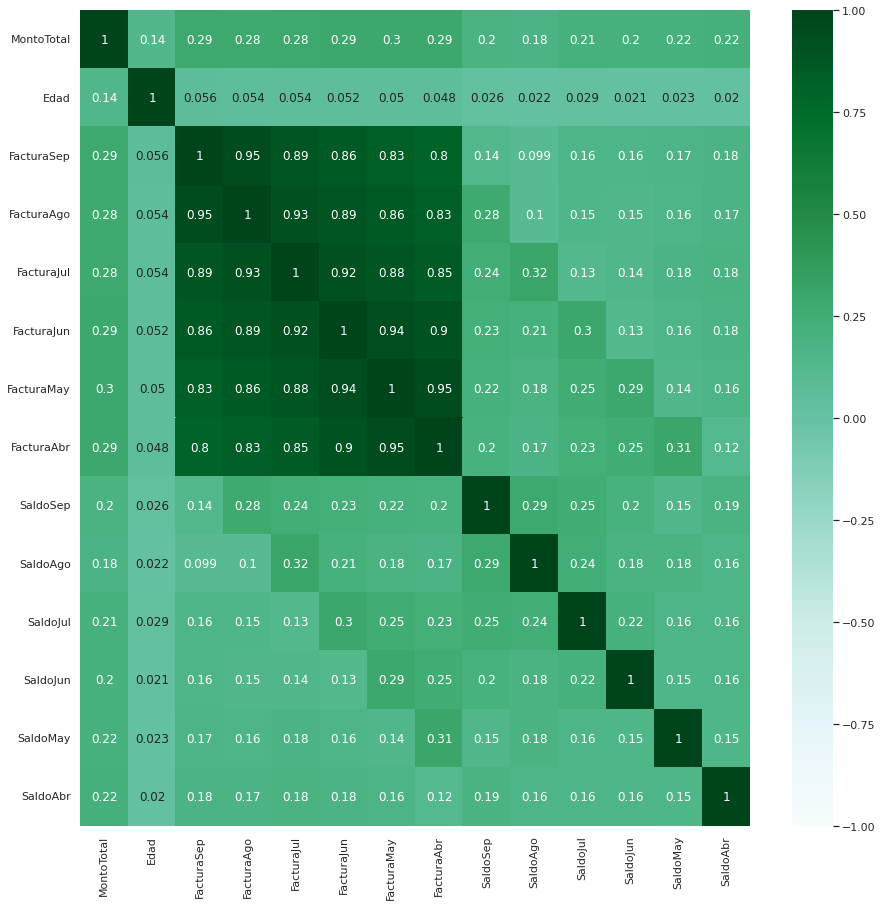

In [87]:
import seaborn as sns

correlacion = df_numeros.corr()
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(correlacion, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

Podemos visualizar que las casillas blancas o verde oscuro son las que cuentan con una mayor correlación, cuando tenemos una casilla verde oscuro podemos notar que presenta una correlación positiva (crecen proporcionalmente). Por el lado contrario entre más blanca es la casilla podemos visualizar una correlación negativa (inversamente proporcionales, mientras una crece la otra disminuye). Cuando no hay correlación visualizamos una casilla verde claro.
Segun el mapa de calor podemos visualizar varias correlaciones entre variables lo que significa información repetida para el modelo. 

Visualizamos las varianzas de algunas variables 

In [89]:
#Definimos las variables de interes a analizar, las cuales fueron las que presentaron correlacion positiva
columnas = ["MontoTotal", "Edad", "FacturaSep",	"FacturaAgo", "FacturaJul", "FacturaJun",	"FacturaMay", "FacturaAbr", "SaldoSep",	"SaldoAgo",	"SaldoJul",	"SaldoJun", "SaldoMay", "SaldoAbr"]
#Creamos un objeto que contenga los valores de los estadisticos de interes
summary = {
  "Varianzas": df_numeros[columnas].var()[0:15], #Utilizamos solo los varoles, sin el nombre de las variables 
  "Valor Min": df_numeros[columnas].min()[0:15],
  "Valor Max": df_numeros[columnas].max()[0:15]
}
pd.DataFrame(summary, index = columnas).transpose() #Meteremos todo dentro de un dataframe para darle mejor visualización
#Con transpose convertimos las columnas en filas y viceversa

,MontoTotal,Edad,FacturaSep,FacturaAgo,FacturaJul,FacturaJun,FacturaMay,FacturaAbr,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr
Varianzas,1.683177e+10,84.903672,5.427998e+09,5.071040e+09,4.814312e+09,4.142813e+09,3.699829e+09,3.550120e+09,2.745259e+08,5.315784e+08,3.103706e+08,2.457434e+08,2.336481e+08,3.164479e+08
Valor Min,1.000000e+04,21.000000,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Valor Max,1.000000e+06,79.000000,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05,8.735520e+05,1.684259e+06,8.960400e+05,6.210000e+05,4.265290e+05,5.286660e+05


Pero para aplicar PCA no es suficiente con obtener las varianzas de cada columna, ya que como bien sabemos la varianza se ve fuertemente afectada por la magnitud de las variables (min y max), es decir, no necesariamente la de mayor varianza sera la más relevante para el modelo. 

In [93]:
varianza_total = df_numeros.var().sum() #Buscamos la varianza total de todas las variables 

#Calculamos varianza para las variables de estudio  
var_monto = df_numeros.MontoTotal.var()
var_edad = df_numeros.Edad.var()
var_FacSep = df_numeros.FacturaSep.var()
var_FacAgo = df_numeros.FacturaAgo.var()
var_FacJul = df_numeros.FacturaJul.var()
var_FacJun = df_numeros.FacturaJun.var()
var_FacMay = df_numeros.FacturaMay.var()
var_FacAbr = df_numeros.FacturaAbr.var()
var_SalSep = df_numeros.SaldoSep.var()
var_SalAgo = df_numeros.SaldoAgo.var()
var_SalJul  = df_numeros.SaldoJul.var()
var_SalJun = df_numeros.SaldoJun.var()
var_SalMay = df_numeros.SaldoMay.var()
var_SalAbr = df_numeros.SaldoAbr.var()


#Calculamos el porcentaje de varianza de cada variable respecto al total
print('Varianza Total \t\t:',varianza_total.round(2) )
print('Varianza Edad \t:', ((var_edad/varianza_total)*100).round(2),'%' )
print('Varianza Factura Sep \t:', ((var_FacSep/varianza_total)*100).round(2),'%' )
print('Varianza Factura Ago \t:', ((var_FacAgo/varianza_total)*100).round(2),'%' )
print('Varianza Factura Jul \t:', ((var_FacJul/varianza_total)*100).round(2),'%' )
print('Varianza Factura Jun \t:', ((var_FacJun/varianza_total)*100).round(2),'%' )
print('Varianza Factura May \t:', ((var_FacMay/varianza_total)*100).round(2),'%' )
print('Varianza Factura Abr \t:', ((var_FacAbr/varianza_total)*100).round(2),'%' )
print('Varianza Saldo Sep \t:', ((var_SalSep /varianza_total)*100).round(2),'%' )
print('Varianza Saldo Ago \t:', ((var_SalAgo/varianza_total)*100).round(2),'%' )
print('Varianza Saldo Jul \t:', ((var_SalJul /varianza_total)*100).round(2),'%' )
print('Varianza Saldo Jun \t:', ((var_SalJun/varianza_total)*100).round(2),'%' )
print('Varianza Saldo May \t:', ((var_SalMay/varianza_total)*100).round(2),'%' )
print('Varianza Saldo Abr \t:', ((var_SalAbr/varianza_total)*100).round(2),'%' )

Varianza Total 		: 45450192693.29
Varianza Edad 	: 0.0 %
Varianza Factura Sep 	: 11.94 %
Varianza Factura Ago 	: 11.16 %
Varianza Factura Jul 	: 10.59 %
Varianza Factura Jun 	: 9.12 %
Varianza Factura May 	: 8.14 %
Varianza Factura Abr 	: 7.81 %
Varianza Saldo Sep 	: 0.6 %
Varianza Saldo Ago 	: 1.17 %
Varianza Saldo Jul 	: 0.68 %
Varianza Saldo Jun 	: 0.54 %
Varianza Saldo May 	: 0.51 %
Varianza Saldo Abr 	: 0.7 %


Visualizamos que la variable con mayor porcentaje de varianza es "FacturaSep" con el 11.94%, como lo mencionamos antes, esto esta directamente relacionado con el rango de valores. 

Procedemos a realizar el escalamiento de los datos para poder realizar el PCA.

In [95]:
#Utilizamos la libreria de scikit

from sklearn.preprocessing import StandardScaler
escalamiento = StandardScaler()
escalado = escalamiento.fit_transform(df_numeros)

escalado[:5] #Imprimimos los primeros 5 resultados para tener una mejor visualización

array([[-1.13736269, -1.24628151, -0.64249667, -0.64735943, -0.66792529,
        -0.67241933, -0.66303081, -0.65271388, -0.34188963, -0.22713422,
        -0.29678248, -0.30810735, -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, -0.66669659, -0.63920112,
        -0.62158315, -0.6062287 , -0.59798248, -0.34188963, -0.21364509,
        -0.24001926, -0.24431534, -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, -0.49394006, -0.48243607,
        -0.44976246, -0.41727743, -0.39174531, -0.25027025, -0.19195838,
        -0.24001926, -0.24431534, -0.24870184, -0.01240721],
       [-0.90612232,  0.16458968, -0.057797  , -0.01358648,  0.03255235,
        -0.23251237, -0.18692884, -0.15680815, -0.22117899, -0.16944758,
        -0.22866662, -0.23793614, -0.2441877 , -0.23726923],
       [-0.90612232,  2.33516075, -0.57864758, -0.6112971 , -0.16138262,
        -0.34708021, -0.34825998, -0.33162637, -0.22117899,  1.33396163,
         0.27084964,  0.26

Convertiremos el resultado en una dataframe para tener una mejor visualización

In [96]:
df_escalado = pd.DataFrame(escalado, columns=df_numeros.columns)
df_escalado.head() #Imprimimos los primeros 5 renglones 

,MontoTotal,Edad,FacturaSep,FacturaAgo,FacturaJul,FacturaJun,FacturaMay,FacturaAbr,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


Ahora visualizamos todos los datos en una misma escala, procedemos a calcular por segunda vez la varianza solo para el nuevo conjunto de datos. 

In [97]:
summary = {
"Varianzas": df_escalado[columnas].var()[0:3],
"Valor Min": df_escalado[columnas].min()[0:3],
"Valor Max": df_escalado[columnas].max()[0:3]
}
#recuerda que la variable cols la definimos más arriba.
pd.DataFrame(summary, index = columnas).transpose()

,MontoTotal,Edad,FacturaSep,FacturaAgo,FacturaJul,FacturaJun,FacturaMay,FacturaAbr,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr
Varianzas,1.000033,1.000033,1.000033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor Min,-1.214443,-1.571867,-2.943086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor Max,6.416489,4.722789,12.396047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Aplicando PCA

In [104]:
from sklearn.decomposition import PCA
spc = PCA()
spc.fit(dataframe.iloc[:, 3:].dropna(axis=0))
spcSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(spc.explained_variance_),
                             'Proportion of variance': spc.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(spc.explained_variance_ratio_)
                             })
spcSummary_df = spcSummary_df.transpose()
spcSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11
Standard deviation,155846.188859,37338.865667,27844.266355,21441.524432,20314.800613,18521.060368,17040.622246,16328.049834,11623.455093,10434.984689,8786.754256,8200.532958
Proportion of variance,0.848685,0.048717,0.027091,0.016064,0.014420,0.011986,0.010147,0.009316,0.004721,0.003805,0.002698,0.002350
Cumulative proportion,0.848685,0.897402,0.924493,0.940557,0.954978,0.966964,0.977111,0.986427,0.991147,0.994952,0.997650,1.000000


##Plot

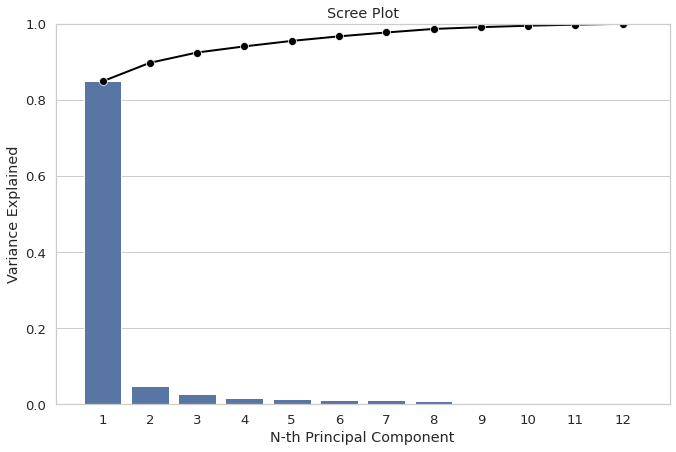

In [105]:
ComponentesPC = np.arange(spc.n_components_) + 1 

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(11, 7))

_ = sns.barplot(x = ComponentesPC, 
                y = spc.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = ComponentesPC-1, 
                 y = np.cumsum(spc.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [106]:
((spcSummary_df.iloc[2][2])*100).round(0)

92.0

In [107]:
((spcSummary_df.iloc[2][1])*100).round(2)

89.74

In [109]:
spcSummary_df.columns = ['ComponentePC{}'.format(i) for i in range(1, len(spcSummary_df.columns) + 1)]
spcSummary_df.round(4)

,ComponentePC1,ComponentePC2,ComponentePC3,ComponentePC4,ComponentePC5,ComponentePC6,ComponentePC7,ComponentePC8,ComponentePC9,ComponentePC10,ComponentePC11,ComponentePC12
Standard deviation,155846.1889,37338.8657,27844.2664,21441.5244,20314.8006,18521.0604,17040.6222,16328.0498,11623.4551,10434.9847,8786.7543,8200.5330
Proportion of variance,0.8487,0.0487,0.0271,0.0161,0.0144,0.0120,0.0101,0.0093,0.0047,0.0038,0.0027,0.0023
Cumulative proportion,0.8487,0.8974,0.9245,0.9406,0.9550,0.9670,0.9771,0.9864,0.9911,0.9950,0.9977,1.0000


In [111]:
spc.components_

array([[ 0.44656461,  0.44087693,  0.42919077,  0.39747537,  0.36945588,
         0.35264686,  0.02497139,  0.02839799,  0.02384069,  0.0193439 ,
         0.01899535,  0.02062347],
       [-0.54888254, -0.39387686, -0.05033694,  0.25752056,  0.42411976,
         0.47973474,  0.04354568,  0.1693322 ,  0.1418858 ,  0.1001013 ,
         0.06198363, -0.01232463],
       [-0.19018781, -0.03592038,  0.53851465,  0.06858663, -0.20601911,
        -0.31179823,  0.20413308,  0.68037607,  0.04461404, -0.02525761,
         0.02765427,  0.14212366],
       [ 0.31379593,  0.02841729, -0.33293318, -0.24751485, -0.003609  ,
         0.12704839,  0.24451464,  0.25931845,  0.42290096,  0.41473739,
         0.31395123,  0.36879668],
       [ 0.07828899, -0.07521296,  0.22987527, -0.5474724 , -0.07862123,
         0.43473142, -0.17223316,  0.1907648 , -0.47326589,  0.12523702,
         0.28471043, -0.23171547],
       [-0.45818916,  0.52636109,  0.03092311, -0.17722815, -0.0138917 ,
         0.07663942,  

In [113]:
spcComponents_df = pd.DataFrame(spc.components_.transpose(), 
                                columns = spcSummary_df.columns,
                                index = dataframe.iloc[:, 3:].columns
                                )
spcComponents_df.iloc[:,:5]

,ComponentePC1,ComponentePC2,ComponentePC3,ComponentePC4,ComponentePC5
FacturaSep,0.446565,-0.548883,-0.190188,0.313796,0.078289
FacturaAgo,0.440877,-0.393877,-0.035920,0.028417,-0.075213
FacturaJul,0.429191,-0.050337,0.538515,-0.332933,0.229875
FacturaJun,0.397475,0.257521,0.068587,-0.247515,-0.547472
FacturaMay,0.369456,0.424120,-0.206019,-0.003609,-0.078621
FacturaAbr,0.352647,0.479735,-0.311798,0.127048,0.434731
SaldoSep,0.024971,0.043546,0.204133,0.244515,-0.172233
SaldoAgo,0.028398,0.169332,0.680376,0.259318,0.190765
SaldoJul,0.023841,0.141886,0.044614,0.422901,-0.473266
SaldoJun,0.019344,0.100101,-0.025258,0.414737,0.125237


In [114]:
spcComponents_dfX = pd.DataFrame(spc.components_.transpose(), 
                                columns = spcSummary_df.columns,
                                index = dataframe.iloc[:, 3:].columns
                                )
spcComponents_dfX

,ComponentePC1,ComponentePC2,ComponentePC3,ComponentePC4,ComponentePC5,ComponentePC6,ComponentePC7,ComponentePC8,ComponentePC9,ComponentePC10,ComponentePC11,ComponentePC12
FacturaSep,0.446565,-0.548883,-0.190188,0.313796,0.078289,-0.458189,0.008577,0.077790,0.171313,-0.266927,-0.204596,-0.004456
FacturaAgo,0.440877,-0.393877,-0.035920,0.028417,-0.075213,0.526361,-0.065076,0.103413,0.012025,0.351264,0.476445,0.014769
FacturaJul,0.429191,-0.050337,0.538515,-0.332933,0.229875,0.030923,0.079499,-0.117665,-0.336217,0.153182,-0.441660,-0.082974
FacturaJun,0.397475,0.257521,0.068587,-0.247515,-0.547472,-0.177228,-0.228896,-0.101795,-0.140917,-0.372583,0.233541,0.320344
FacturaMay,0.369456,0.424120,-0.206019,-0.003609,-0.078621,-0.013892,0.480798,0.124713,0.099384,-0.055804,0.092366,-0.605435
FacturaAbr,0.352647,0.479735,-0.311798,0.127048,0.434731,0.076639,-0.262927,-0.099633,0.240806,0.203435,-0.158534,0.365659
SaldoSep,0.024971,0.043546,0.204133,0.244515,-0.172233,0.609538,-0.080363,0.181476,0.275944,-0.471005,-0.396501,-0.015015
SaldoAgo,0.028398,0.169332,0.680376,0.259318,0.190765,-0.257290,-0.001958,0.239523,0.360795,0.023182,0.383973,0.047467
SaldoJul,0.023841,0.141886,0.044614,0.422901,-0.473266,-0.156551,-0.304679,0.248278,-0.192799,0.503796,-0.285763,-0.151205
SaldoJun,0.019344,0.100101,-0.025258,0.414737,0.125237,0.082474,0.450781,0.236372,-0.589458,-0.135020,0.079024,0.404305


In [115]:
from sklearn import preprocessing
dataframe.iloc[:, 3:].head() #Imprimimos las primeras 5 filas de la base de datos

,FacturaSep,FacturaAgo,FacturaJul,FacturaJun,FacturaMay,FacturaAbr,SaldoSep,SaldoAgo,SaldoJul,SaldoJun,SaldoMay,SaldoAbr
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [116]:
spc = PCA()
spc.fit(preprocessing.scale(dataframe.iloc[:, 5:].dropna(axis=0)))

PCA()

In [117]:
spcSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(spc.explained_variance_),
                             'Proportion of variance': spc.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(spc.explained_variance_ratio_)
                             })

spcSummary_df = spcSummary_df.transpose()
spcSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(spcSummary_df.columns) + 1)]
spcSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Standard deviation,2.0458,1.2244,0.9520,0.9367,0.9286,0.8818,0.8429,0.3382,0.2060,0.1580
Proportion of variance,0.4185,0.1499,0.0906,0.0877,0.0862,0.0778,0.0710,0.0114,0.0042,0.0025
Cumulative proportion,0.4185,0.5684,0.6591,0.7468,0.8330,0.9108,0.9818,0.9933,0.9975,1.0000


In [118]:
spcSummary_df.iloc[2,6]

0.9818231606214401

In [120]:
from sklearn.decomposition import PCA
spc = PCA()
spc_t = spc.fit_transform(df_escalado)
spc_t[:5]

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00,
        -1.76466173e-01,  1.78476835e-02,  2.77646145e-03,
         1.29010046e-02,  5.80885205e-02,  2.21268695e-01,
         2.02066015e-02,  1.68710287e-02, -3.14858410e-03,
         8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01,
        -2.80889399e-01,  4.94098943e-02, -1.18062416e-01,
         9.91641641e-02,  7.52386637e-02, -2.87026648e-01,
        -7.30485666e-02, -5.57769745e-03,  1.22574823e-02,
        -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01,
        -7.66632559e-03,  1.26938297e-01, -6.20521778e-02,
        -1.40071875e-02,  8.40632249e-02,  2.82844658e-01,
        -1.60703686e-02,  1.12401687e-01, -8.04550604e-02,
        -4.13466939e-02, -5.71189238e-02],
       [-5.41595290e-01, -6.66646687e-01,  9.76280692e-02,
         2.92571245e-01,  8.85437669e-03,  1.09430096e-01,
        -1.34229136e-01,  6.32182383e-02,  5.

Ahora calcularemos el porcentaje de la varianza acumulado y explicada por cada componente

In [121]:
spcSummary_df = pd.DataFrame({
                              '% varianza explicada': np.round(spc.
                                                               explained_variance_ratio_,4) * 100,
                              '% varianza acumulada': np.cumsum(spc.
                                                                explained_variance_ratio_) * 100})
spcSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


##Paso 2

In [170]:
dfCreditos = pd.read_csv(creditos)
dfCreditos.dropna(axis = 0, inplace=True) #Procedemos a hacer una prelimpieza de los datos fltantes ya que el metodo utilizaod es sencible
dfCreditosNro = dfCreditos.iloc[:,1:]

dfCreditosNro.corr() #Creamos una matriz de correlacion nuevamente para validar los valores que esten mas relacionados

var_normal_credit = StandardScaler()
normalizado_credit = var_normal_credit.fit_transform(dfCreditosNro)

dfCreditosNroEscalado=pd.DataFrame(normalizado_credit, columns=dfCreditosNro.columns)

AtributosPCA = ["X5", "X12", "X13", "X16", "X17"]  #Deacuerdo al analisis previo que hicimos en el paso numero uno podemos saber que las variables de X12 a X17 tienen una fuerte correlación.

#Aplicaremos nuevamente las tecnicas de procesamiento PCA sobre los atributos X5, X12, X13, X16 y X17

#Guardamos en la siguiente variable lo obteniedo nuevamente en el analisis PCA
MiResumen = {"Varianzas": dfCreditosNroEscalado[AtributosPCA].var()[0:5], "Rango Minimo": dfCreditosNroEscalado[AtributosPCA].min()[0:5], "Rango Máximo": dfCreditosNroEscalado[AtributosPCA].max()[0:5]}

pd.DataFrame(MiResumen, index = AtributosPCA).transpose()

Componentes = PCA()
ComponentesResult = Componentes.fit_transform(dfCreditosNroEscalado)
#Se obtiene la varianza acumulada por cada componenete obtenido
ComponentesExplicadosDF = pd.DataFrame({'% Varianza del componente': np.round(Componentes.explained_variance_ratio_,4) * 100, '% Varianza acumulada': np.cumsum(Componentes.explained_variance_ratio_) * 100
})

dfCreditosNroEscaladoResult = pd.DataFrame(ComponentesResult)


In [171]:
#Buscamos los atributos que mas contribuyen con los componentes seleciconados a raiz del analicis PCA (del 0 al 12)

dfComponentesCredito = pd.DataFrame(Componentes.components_.round(4), columns = dfCreditosNroEscaladoResult.columns, index = dfCreditosNroEscalado.columns)
dfComponentesCredito.iloc[:,:13]

,0,1,2,3,4,5,6,7,8,9,10,11,12
X1,0.0656,-0.0220,0.0198,-0.0056,0.0140,0.1646,0.1973,0.2034,0.2100,0.2137,0.2089,0.3327,0.3441
X2,0.3117,0.0305,-0.0885,-0.0394,0.0628,-0.2967,-0.3280,-0.3349,-0.3344,-0.3212,-0.2958,0.1436,0.1441
X3,0.0100,0.0281,-0.3177,0.4676,-0.4777,-0.0207,0.0187,0.0638,0.0918,0.1118,0.1140,-0.1459,-0.1227
X4,0.0766,-0.0795,0.2268,-0.4291,0.4472,0.0204,0.0480,0.0798,0.1035,0.1098,0.1045,-0.1719,-0.1527
X5,-0.1982,0.7393,0.4512,-0.0270,-0.1394,-0.1113,-0.0519,-0.0025,0.0373,0.0549,0.0634,-0.0150,0.0078
X6,-0.2670,-0.6251,0.3911,0.2318,0.0047,-0.1340,-0.0613,-0.0165,0.0062,0.0171,0.0095,0.0117,0.0407
X7,-0.2615,0.0074,0.4091,0.1898,-0.1401,0.2181,0.0431,-0.0892,-0.1959,-0.2347,-0.2336,0.0300,0.0284
X8,0.0457,0.0752,-0.3156,-0.1201,0.0480,-0.0247,-0.0799,-0.0454,-0.0139,0.0424,0.0810,-0.0603,-0.0102
X9,-0.0267,-0.0480,0.0537,0.0104,0.0075,-0.0360,0.0050,-0.0079,-0.0146,0.0138,0.0937,-0.0246,-0.0805
X10,0.0227,0.0183,-0.1567,-0.0569,0.0476,-0.0328,-0.0340,-0.0110,0.0458,0.0564,0.0013,-0.0649,-0.0461


In [175]:
#Con la siguiente forma obtenemos la magnitud del valor absoluto del coeficiente. A mayor valor absoluto, sera mayor el peso del atributo n el calculo del componente
dfComponentesCredito.iloc[:,:13].abs().idxmax()


#Con esto demostramos que nuestro atributo X17 nos agrega masyor valor segun la seleccion de componentes.
#Representa mayor peso en los componentes 6, 8 y 10.


0     X15
1      X5
2      X5
3     X14
4     X14
5     X16
6     X17
7     X19
8     X17
9     X20
10    X17
11    X18
12      Y
dtype: object

##Paso 3

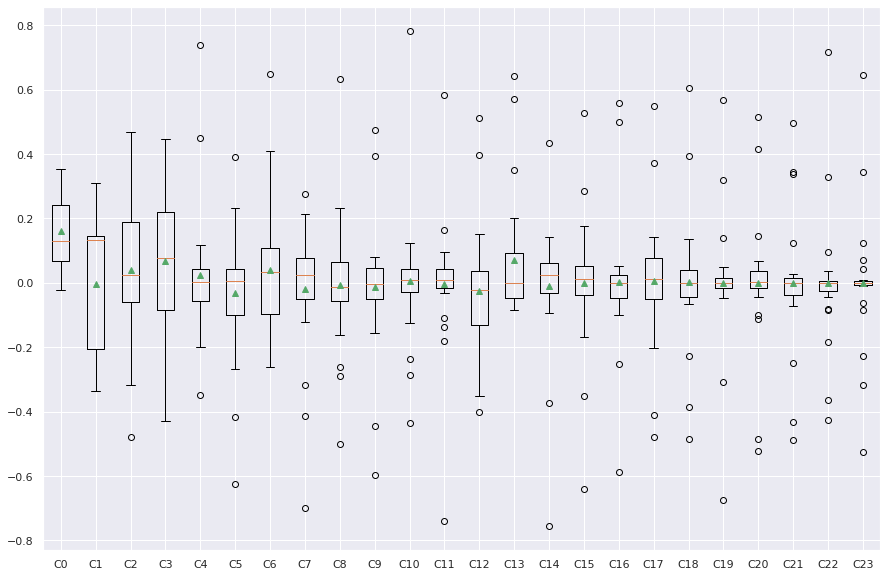

In [176]:
#Creamos una lista con los nombres de los 23 componentes para enviarlo a graficar junto con el dataframe
#Con este Boxplot podemos decir que nuestros componentes cubren el 90% de la varianza.
nombres=list()
nombres=[f'C{i}' for i in range(len(dfCreditosNroEscalado.columns))]

plt.boxplot(dfComponentesCredito, labels=nombres, showmeans=True)
plt.show()

#Parte 2

##1. ¿Cuál es el número de componentes mínimo y por qué?





Después del análisis realizado se llego a la conclusión que el número de componentes mínimo es de 8. Lo anterior mencionado es debido a que con los 8 componentes podemos dar explicación a un 92% de varianza del conjunto de datos. Con un número menor como 6 estaríamos en 81%. Creemos que al agregar los otros 2 valores adicionales que están altamente relacionados con los otros estamos aplicando un buen análisis de componentes principales.

##2. ¿Cuál es la variación de los datos que representan esos componentes?

Consideramos que los 8 componentes que elegimos comprenden el 92% de la varianza total de nuestros datos. Lo que no crea una gran perspectiva de como se distribuyen los datos en nuestro conjunto original.

##3. ¿Cuál es la pérdida de información después de realizar PCA?

La variable TRSep2005 tiene el mayor peso en sus componentes con un 87% en PC2, seguido de TPPSep2005 con un 82% en PC1. Lo que podemos apreciar es que las variables de “Total de pagos pasados” tiene mayor peso en los componentes aunque cuente con mayor cantidad de valores atípicos. Necesitamos realizar mas transformaciones y validaciones para verificar nuestro modelo.

##4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

El PCA lo utilizamos para reducir el número de variables de un conjunto de datos para hacer mas fácil su análisis. Lo anterior mencionado es debido a la relación entre los diferentes atributos. Podemos mencionar los siguientes dos casos en donde es recomendable usar esta técnica:
•	Cuando tenemos un gran volumen de atributos a analizar. Se necesita una manera más fácil y efectiva para procesar los datos y generar nuestro modelo. De igual forma las relaciones entre las variables pueden ser ajustadas.
•	Cuando contamos con variables con un nivel de correlación alto. Como el conjunto de datos del ejemplo, tenemos variables que dependen o tienen correlación con las demás. Si al aumentar el valor de una variable determinada, se incrementa el valor en otra o decrece de manera proporcional podemos concluir que estas variables son correlacionales.
Como resultado tenemos que el PCA no crea la posibilidad de tener un numero bajo de dimensiones en nuestros datos, lo que nos lleva a un procesamiento mejor y modelos con más facilidad de implementación. El Machine Learning requiere de grandes volúmenes de datos para aumentar su eficiencia y calidad, la posibilidad de tener opciones como PCA disminuye la cantidad de datos en componentes más fáciles de digerir.

##5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?


El PCA lo utilizamos para reducir el número de variables de un conjunto de datos para hacer mas fácil su análisis. Lo anterior mencionado es debido a la relación entre los diferentes atributos. Podemos mencionar los siguientes dos casos en donde es recomendable usar esta técnica:
•	Cuando tenemos un gran volumen de atributos a analizar. Se necesita una manera más fácil y efectiva para procesar los datos y generar nuestro modelo. De igual forma las relaciones entre las variables pueden ser ajustadas.
•	Cuando contamos con variables con un nivel de correlación alto. Como el conjunto de datos del ejemplo, tenemos variables que dependen o tienen correlación con las demás. Si al aumentar el valor de una variable determinada, se incrementa el valor en otra o decrece de manera proporcional podemos concluir que estas variables son correlacionales.
Como resultado tenemos que el PCA no crea la posibilidad de tener un numero bajo de dimensiones en nuestros datos, lo que nos lleva a un procesamiento mejor y modelos con más facilidad de implementación. El Machine Learning requiere de grandes volúmenes de datos para aumentar su eficiencia y calidad, la posibilidad de tener opciones como PCA disminuye la cantidad de datos en componentes más fáciles de digerir.